In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle, Ellipse

## look at photons that arrived at scintillator: where and when?

In [2]:
path = '/Users/erezcohen/Desktop/data/DuSiHodSim/output/csv_files/';

In [60]:
sim_results = pd.read_csv(path + 'version_7.0_EJ204_photons.csv');

In [75]:
ArrivedAtFrontFacet = sim_results[(sim_results['ArrivedAtFrontFacet']==1) & (sim_results['AbsorbedInScintillator']==0)]
ArrivedAtWaveguideExit = sim_results[(sim_results['ArrivedAtFrontFacet']==1) 
                                     & (sim_results['AbsorbedInScintillator']==0) 
                                     & (sim_results['ArrivedAtWaveguideExit']==1) 
                                     & (sim_results['AbsorbedInWaveguide']==0)]
HitBackFacet = ArrivedAtWaveguideExit[ArrivedAtWaveguideExit.HitBackFacet==1]

Ntotal = len(sim_results)
NArrivedAtFrontFacet = len(ArrivedAtFrontFacet)
NArrivedAtWaveguideExit = len(ArrivedAtWaveguideExit)

In [62]:
print Ntotal,'photons were produced in  the scintillator'
print '%.1f'%(100.*float(NArrivedAtFrontFacet)/Ntotal)+'% arrived at front facet and not absorbed in scintillator'
print '%.1f'%(100.*float(NArrivedAtWaveguideExit)/NArrivedAtFrontFacet)+'% of these arrived at waveguide exit and not absorbed in waveguide'

29759 photons were produced in  the scintillator
42.6% arrived at front facet and not absorbed in scintillator
45.3% of these arrived at waveguide exit and not absorbed in waveguide


In [63]:
def set_axes_fontsize(ax,fontsize):
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)

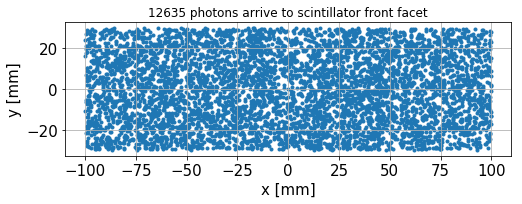

In [64]:
figure,ax = plt.subplots(figsize=(8,8));
plt.scatter( ArrivedAtWaveguideExit.HitFrontFacetPosX, ArrivedAtWaveguideExit.HitFrontFacetPosY , marker='.')
ax.set_xlabel('x [mm]',fontsize=15);
ax.set_ylabel('y [mm]',fontsize=15);
ax.set_title('%d photons arrive to scintillator front facet'%len(Arrived));
set_axes_fontsize(ax,15)
ax.set_aspect('equal')
ax.grid()

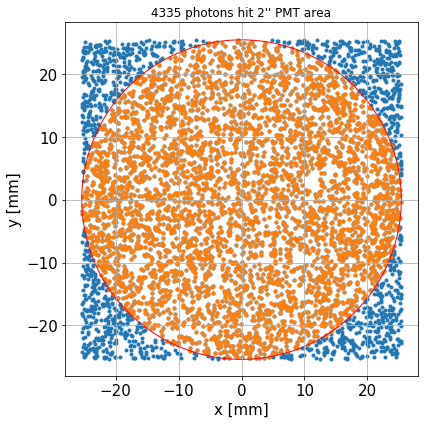

In [65]:
# in PMT
r_PMT = (20/2) * 2.54; # 2'' PMT
InPMTarea = ArrivedAtWaveguideExit[ (np.square(ArrivedAtWaveguideExit.HitWaveguideExitPosX) 
                                  + np.square(ArrivedAtWaveguideExit.HitWaveguideExitPosY)) 
                                    <= np.square(r_PMT) ]

figure,ax = plt.subplots(figsize=(8,6));

circ=plt.Circle((0, 0),r_PMT,linewidth=1,edgecolor='r',facecolor='none')
ax.add_artist(circ)
plt.scatter( ArrivedAtWaveguideExit.HitWaveguideExitPosX, ArrivedAtWaveguideExit.HitWaveguideExitPosY , marker='.')
plt.scatter( InPMTarea.HitWaveguideExitPosX, InPMTarea.HitWaveguideExitPosY , marker='.')
ax.set_xlabel('x [mm]',fontsize=15);
ax.set_ylabel('y [mm]',fontsize=15);
ax.set_title('%d photons hit 2\'\' PMT area'%len(InPMTarea));
set_axes_fontsize(ax,15)
ax.set_aspect('equal')
ax.grid()
plt.tight_layout()

In [68]:
time_bins=np.linspace(0,80,81)

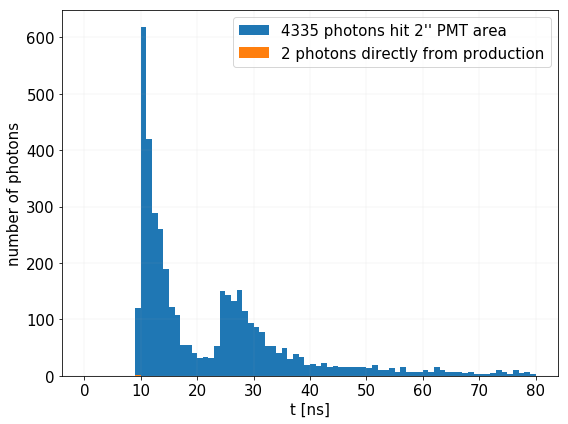

In [69]:
# in PMT
figure,ax = plt.subplots(figsize=(8,6));
plt.hist( InPMTarea.TimeFromStart*1e9 , bins=time_bins , label='%d photons hit 2\'\' PMT area'%len(InPMTarea))

Direct = InPMTarea[InPMTarea.DirectFromProduction==1] 
plt.hist( Direct.TimeFromStart*1e9 , bins=time_bins, label='%d photons directly from production'%len(Direct))
ax.set_xlabel('t [ns]',fontsize=15);
ax.set_ylabel('number of photons',fontsize=15);
set_axes_fontsize(ax,15)
ax.grid(linewidth=0.1)
ax.legend(fontsize=15)
plt.tight_layout()

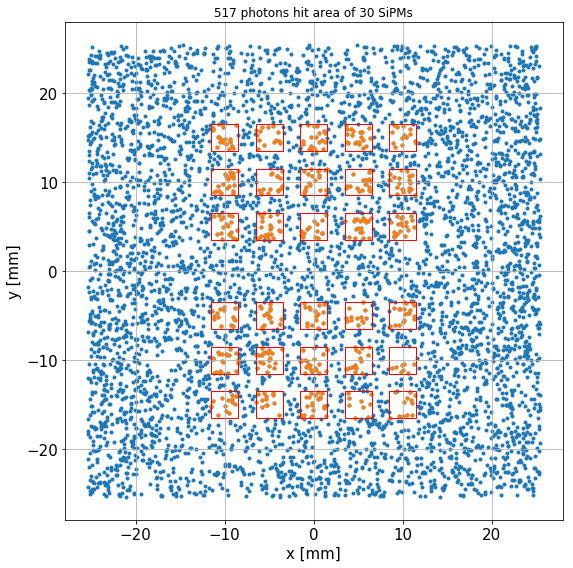

In [70]:
# in SiPM array
aSiPM = 3; # [mm]
margin = 0.1; # [mm]
NSiPMs = 30;
InSiPMarea = pd.DataFrame();
xSiPMs = [-10, -5 , 0 , 5 , 10]
ySiPMs = [-15, -10 , -5 , 5 , 10 , 15]
for xSiPM in xSiPMs:
    for ySiPM in ySiPMs:
        InSiPMarea = pd.concat([InSiPMarea , 
                            ArrivedAtWaveguideExit[ (np.abs((ArrivedAtWaveguideExit.HitWaveguideExitPosX-xSiPM))< float(aSiPM)/2)                        
                                                    & (np.abs((ArrivedAtWaveguideExit.HitWaveguideExitPosY-ySiPM))< float(aSiPM)/2)] ])
        
figure,ax = plt.subplots(figsize=(8,8));
plt.scatter( ArrivedAtWaveguideExit.HitWaveguideExitPosX, ArrivedAtWaveguideExit.HitWaveguideExitPosY , marker='.')
plt.scatter( InSiPMarea.HitWaveguideExitPosX, InSiPMarea.HitWaveguideExitPosY , marker='.')
for xSiPM in xSiPMs:
    for ySiPM in ySiPMs:
        rect = Rectangle((xSiPM-float(aSiPM)/2,ySiPM-float(aSiPM)/2),aSiPM,aSiPM,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)

ax.set_xlabel('x [mm]',fontsize=15);
ax.set_ylabel('y [mm]',fontsize=15);
ax.set_title('%d photons hit area of 30 SiPMs'%len(InSiPMarea));
set_axes_fontsize(ax,15)
ax.set_aspect('equal')
ax.grid()
plt.tight_layout()
# ax.set_xlim(-10,0); ax.set_ylim(-20,0);

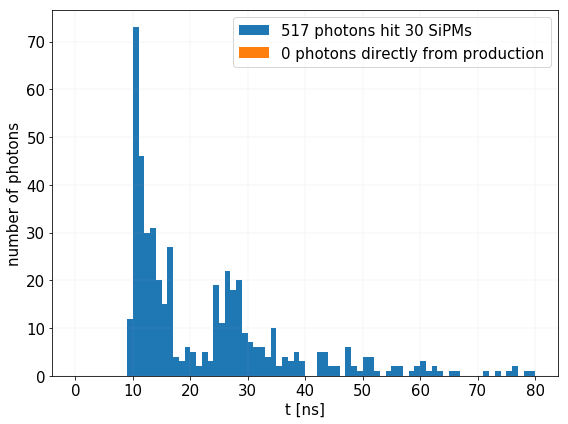

In [71]:
# in PMT
figure,ax = plt.subplots(figsize=(8,6));
plt.hist( InSiPMarea.TimeFromStart*1e9 , bins=time_bins , label='%d photons hit 30 SiPMs'%len(InSiPMarea))

Direct = InSiPMarea[InSiPMarea.DirectFromProduction==1] 
plt.hist( Direct.TimeFromStart*1e9 , bins=time_bins, label='%d photons directly from production'%len(Direct))
ax.set_xlabel('t [ns]',fontsize=15);
ax.set_ylabel('number of photons',fontsize=15);
set_axes_fontsize(ax,15)
ax.grid(linewidth=0.1)
ax.legend(fontsize=15)
plt.tight_layout()

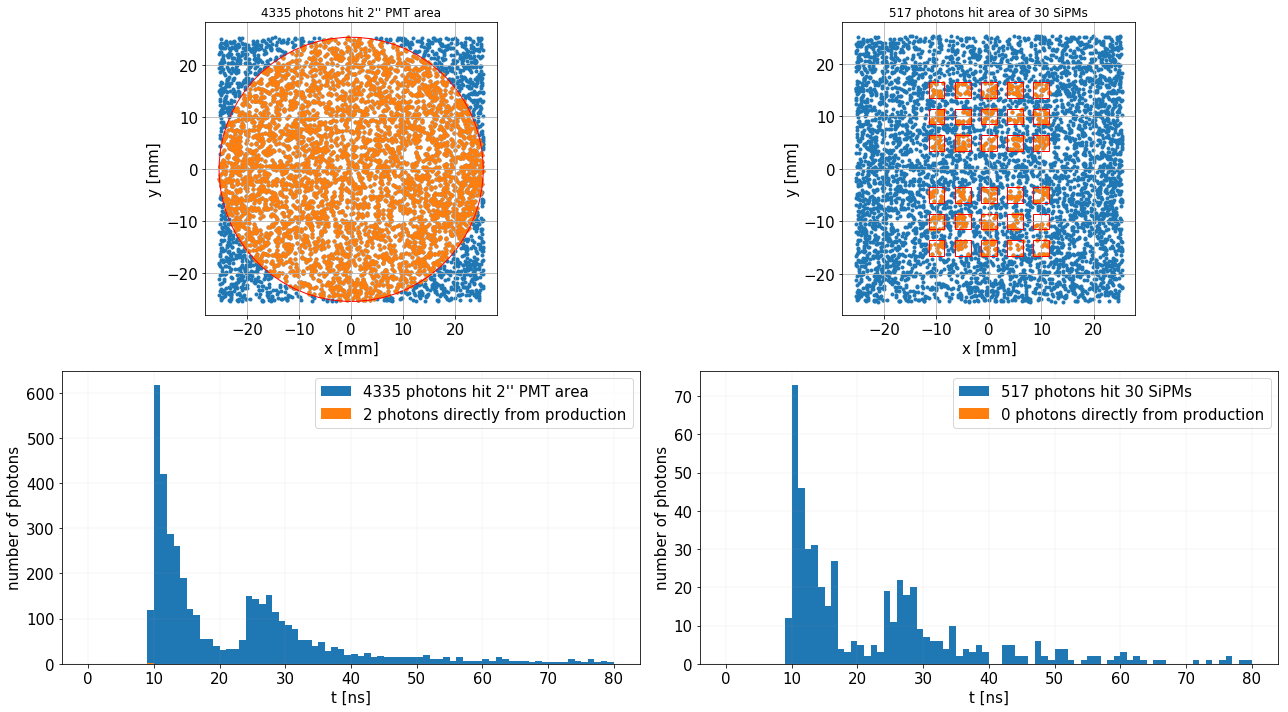

In [73]:
fig = plt.figure(figsize=(18,10));

ax = fig.add_subplot(2,2,1)

circ=plt.Circle((0, 0),r_PMT,linewidth=1,edgecolor='r',facecolor='none')
ax.add_artist(circ)
plt.scatter( ArrivedAtWaveguideExit.HitWaveguideExitPosX, ArrivedAtWaveguideExit.HitWaveguideExitPosY , marker='.')
plt.scatter( InPMTarea.HitWaveguideExitPosX, InPMTarea.HitWaveguideExitPosY , marker='.')
ax.set_xlabel('x [mm]',fontsize=15);
ax.set_ylabel('y [mm]',fontsize=15);
ax.set_title('%d photons hit 2\'\' PMT area'%len(InPMTarea));
set_axes_fontsize(ax,15)
ax.set_aspect('equal')
ax.grid()
plt.tight_layout()

ax = fig.add_subplot(2,2,3)
plt.hist( InPMTarea.TimeFromStart*1e9 , bins=time_bins , label='%d photons hit 2\'\' PMT area'%len(InPMTarea))

Direct = InPMTarea[InPMTarea.DirectFromProduction==1] 
plt.hist( Direct.TimeFromStart*1e9 , bins=time_bins, label='%d photons directly from production'%len(Direct))
ax.set_xlabel('t [ns]',fontsize=15);
ax.set_ylabel('number of photons',fontsize=15);
set_axes_fontsize(ax,15)
ax.grid(linewidth=0.1)
ax.legend(fontsize=15)
plt.tight_layout()

ax = fig.add_subplot(2,2,2)
plt.scatter( ArrivedAtWaveguideExit.HitWaveguideExitPosX, ArrivedAtWaveguideExit.HitWaveguideExitPosY , marker='.')
plt.scatter( InSiPMarea.HitWaveguideExitPosX, InSiPMarea.HitWaveguideExitPosY , marker='.')
for xSiPM in xSiPMs:
    for ySiPM in ySiPMs:
        rect = Rectangle((xSiPM-float(aSiPM)/2,ySiPM-float(aSiPM)/2),aSiPM,aSiPM,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)

ax.set_xlabel('x [mm]',fontsize=15);
ax.set_ylabel('y [mm]',fontsize=15);
ax.set_title('%d photons hit area of 30 SiPMs'%len(InSiPMarea));
set_axes_fontsize(ax,15)
ax.set_aspect('equal')
ax.grid()
plt.tight_layout()

ax = fig.add_subplot(2,2,4)
plt.hist( InSiPMarea.TimeFromStart*1e9 , bins=time_bins , label='%d photons hit 30 SiPMs'%len(InSiPMarea))

Direct = InSiPMarea[InSiPMarea.DirectFromProduction==1] 
plt.hist( Direct.TimeFromStart*1e9 , bins=time_bins, label='%d photons directly from production'%len(Direct))
ax.set_xlabel('t [ns]',fontsize=15);
ax.set_ylabel('number of photons',fontsize=15);
set_axes_fontsize(ax,15)
ax.grid(linewidth=0.1)
ax.legend(fontsize=15)
plt.tight_layout()